In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train.shape

(1460, 81)

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

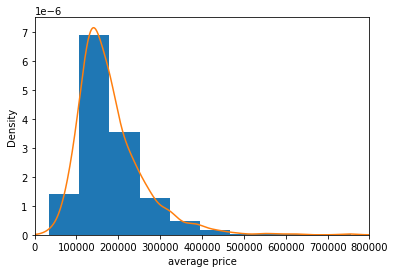

In [9]:
import matplotlib.pyplot as plt
# plt.hist(train['SalePrice'])
fig,ax = plt.subplots(figsize=(6,4))
train['SalePrice'].plot(kind='hist',density=True)
train['SalePrice'].plot(kind = 'kde')
ax.set_xlabel("average price")
ax.set_xlim(0,800000)
plt.show()

In [10]:
print(f"skewness:{train['SalePrice'].skew()}")
print(f"kurtosis:{train['SalePrice'].kurt()}")

skewness:1.8828757597682129
kurtosis:6.536281860064529


<AxesSubplot:>

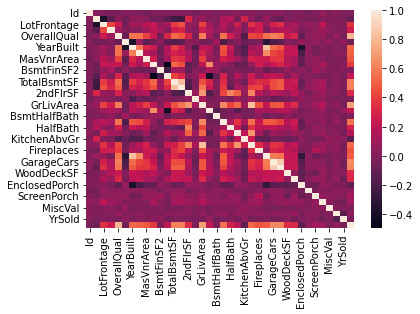

In [11]:
import seaborn as sns
sns.heatmap(train.corr())

In [12]:
# GrLivArea' and 'TotalBsmtSF'. Moreover, we also have common interests such as 'OverallQual' and 'YearBuilt'. This looks promising!

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
numerical_cols = []
for col in train.columns:
    if (train.dtypes[col] == np.int64)or(train.dtypes[col] == np.float64):
        numerical_cols.append(col)

In [14]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [15]:
import seaborn as sns
# sns.heatmap(train[numerical_cols].apply(lambda x: x.corr(train['SalePrice'])))
corelations = pd.DataFrame(train[numerical_cols].apply(lambda x: x.corr(train['SalePrice'])))


In [16]:
corelations.rename(columns={0:'corr_val'},inplace=True)

In [17]:
corelations['variables'] = corelations.index
corelations.reset_index(inplace = True)

In [18]:
corelations.drop(['index'],axis=1,inplace=True)
corelations.head()

,corr_val,variables
0,-0.021917,Id
1,-0.084284,MSSubClass
2,0.351799,LotFrontage
3,0.263843,LotArea
4,0.790982,OverallQual


In [19]:
corelations.head()

,corr_val,variables
0,-0.021917,Id
1,-0.084284,MSSubClass
2,0.351799,LotFrontage
3,0.263843,LotArea
4,0.790982,OverallQual


In [20]:
corelations.iloc[0,:]['corr_val']

-0.021916719443431116

In [21]:
# columns having correlation more than 0.5 with 'SalesPrice'

highly_correlated_columns = []
for i in range(0,corelations.shape[0]):
    if corelations.iloc[i,:]['corr_val']>0.5:
                             highly_correlated_columns.append(corelations.iloc[i,:]['variables'])

In [22]:
highly_correlated_columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

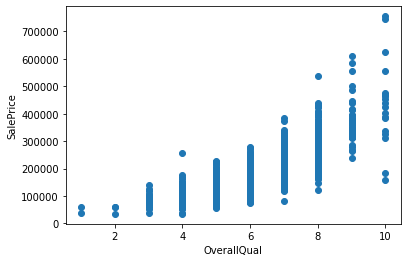

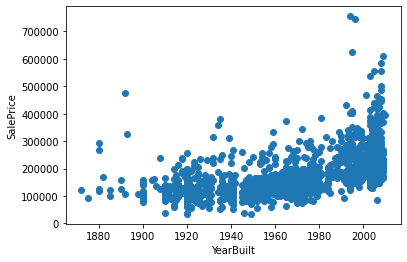

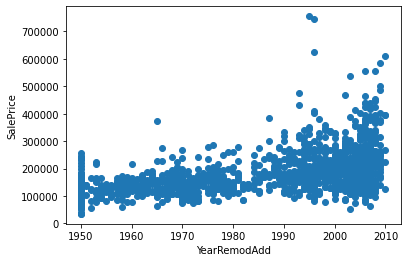

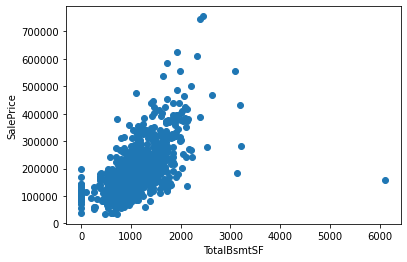

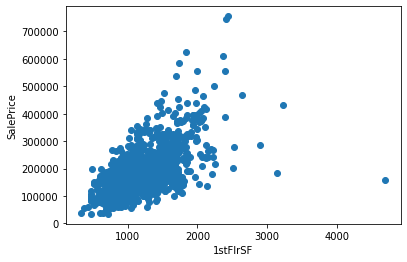

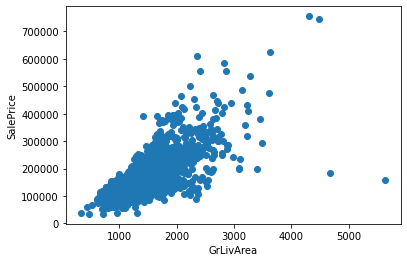

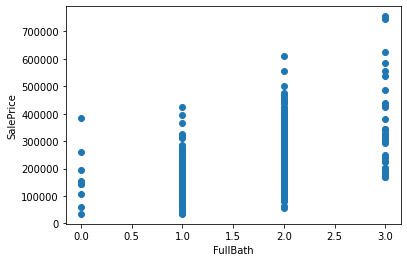

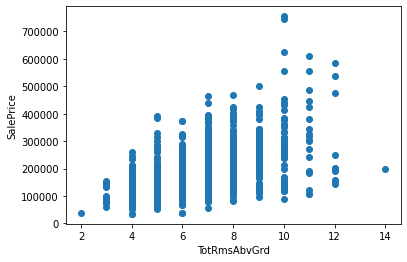

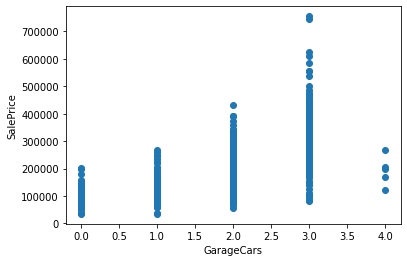

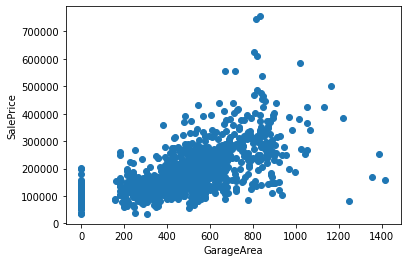

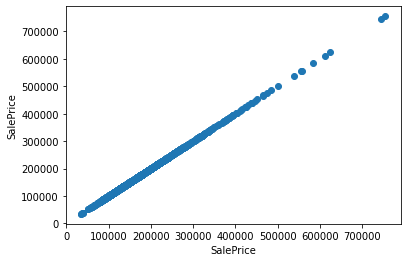

In [23]:
# visually see the co-relation
for i in range(len(highly_correlated_columns)):
    plt.scatter(train[highly_correlated_columns[i]],train['SalePrice'])
#     plt.plot(train[highly_correlated_columns[i]],train['SalePrice'])
    plt.xlabel(highly_correlated_columns[i])
    plt.ylabel("SalePrice")
    plt.show()

In [24]:
# categorical_cols = []
# for col in train.columns:
#     if (train.dtypes[col] == np.O):
#         numerical_cols.append(col)
# categorical_cols 

In [25]:
categorical_data = train.select_dtypes(include=['object'])

In [26]:
type(categorical_data)

pandas.core.frame.DataFrame

In [27]:
categorical_cols  = categorical_data.columns
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [29]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

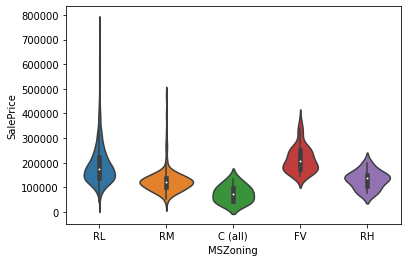

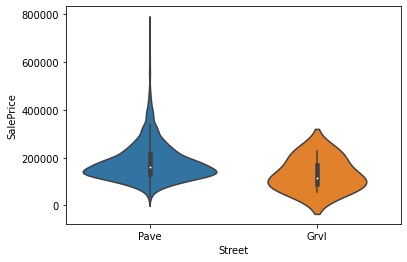

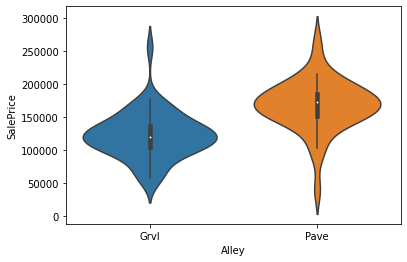

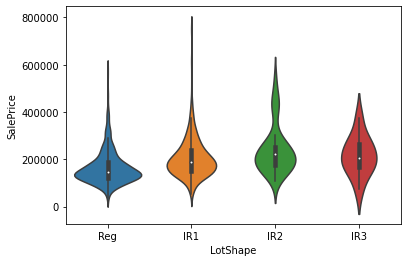

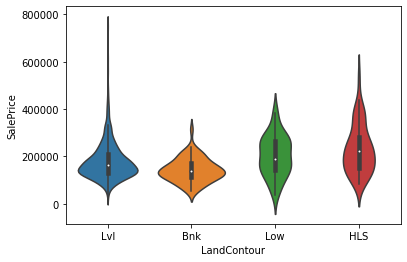

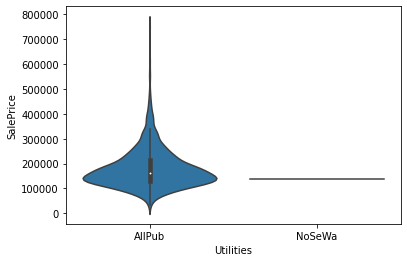

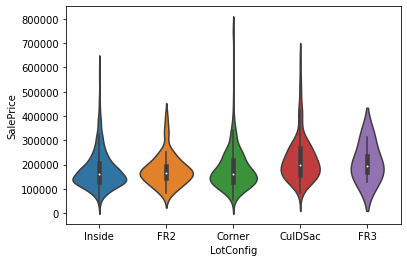

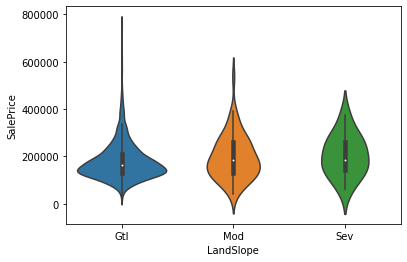

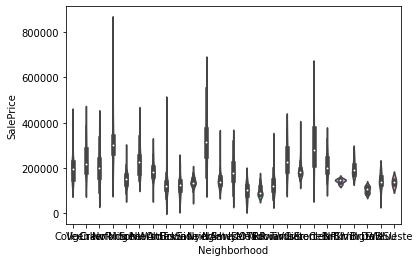

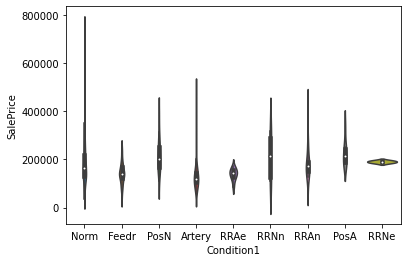

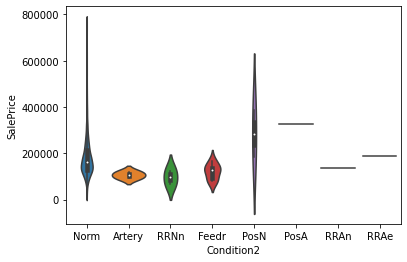

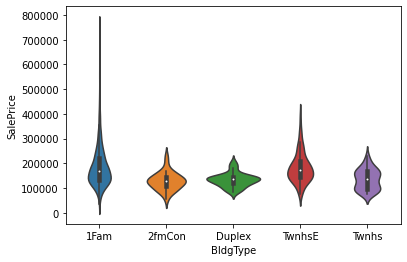

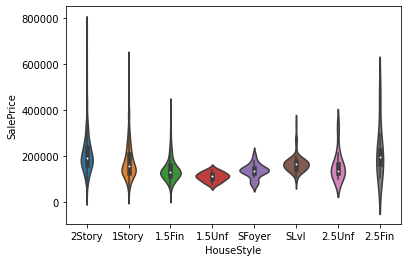

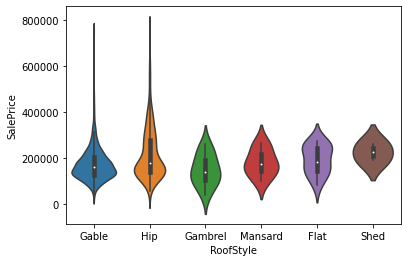

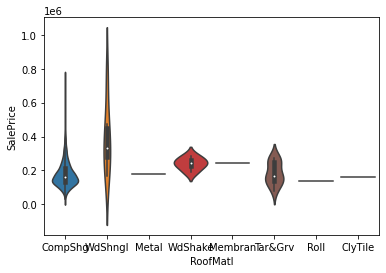

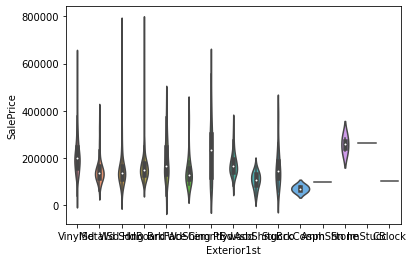

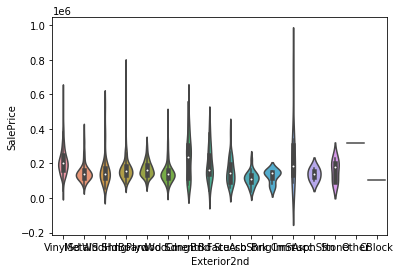

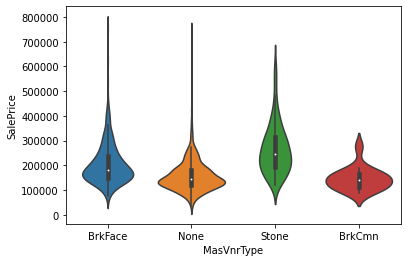

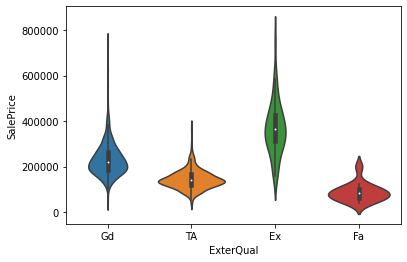

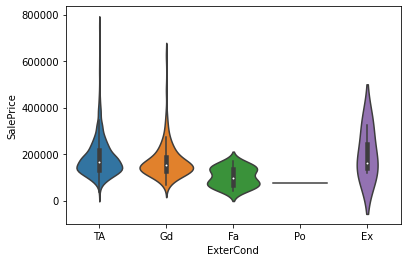

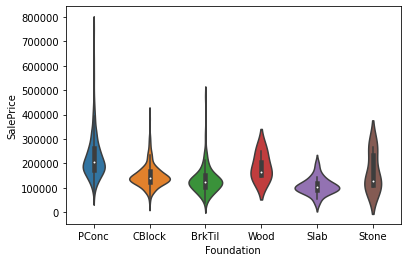

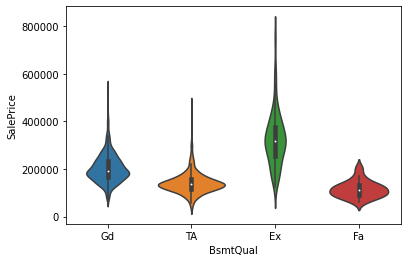

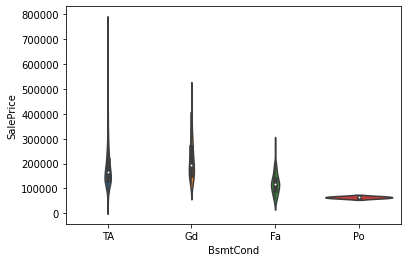

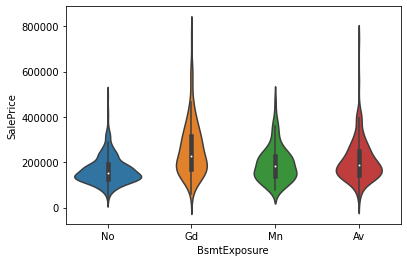

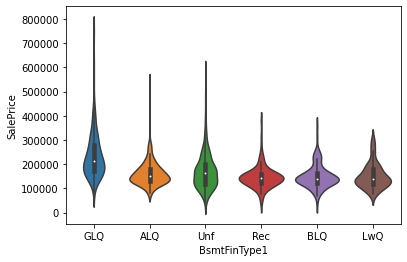

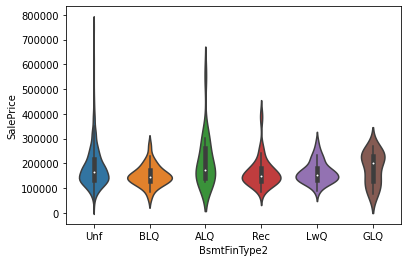

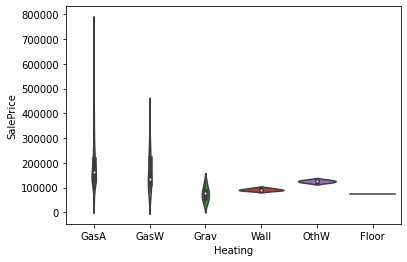

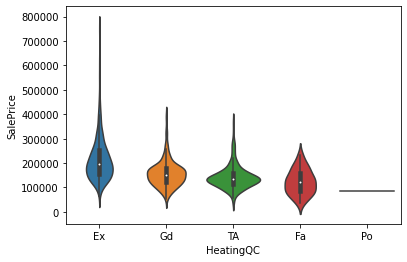

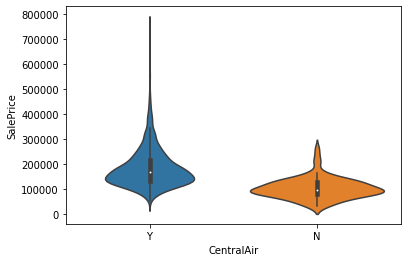

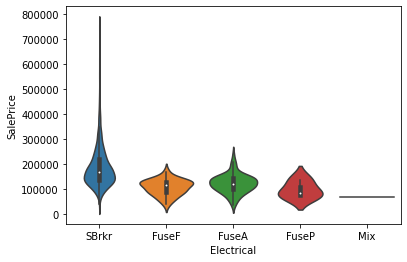

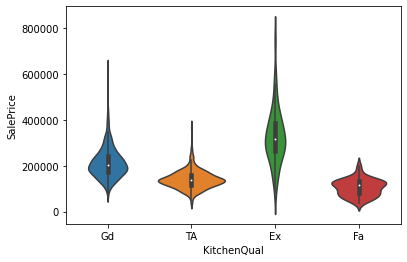

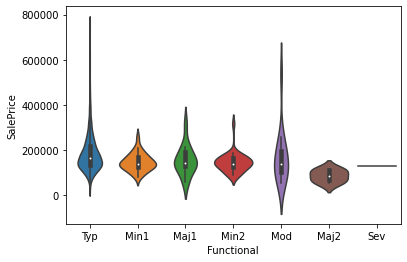

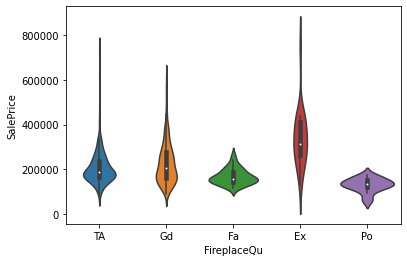

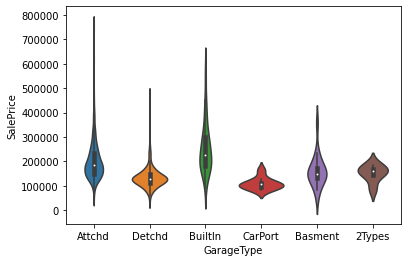

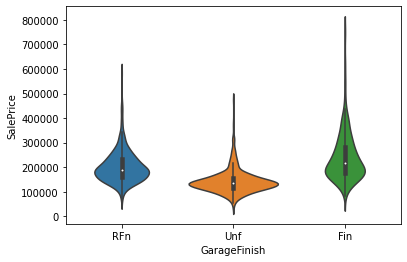

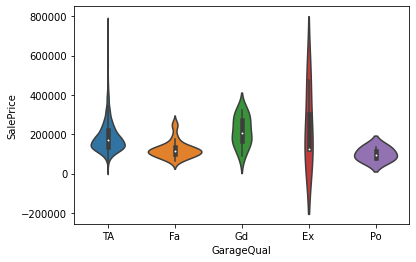

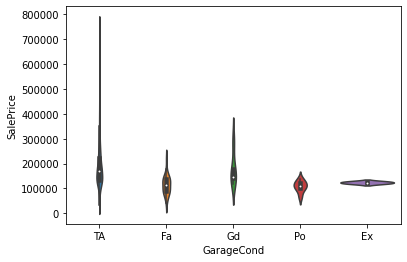

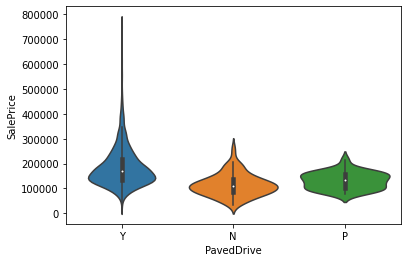

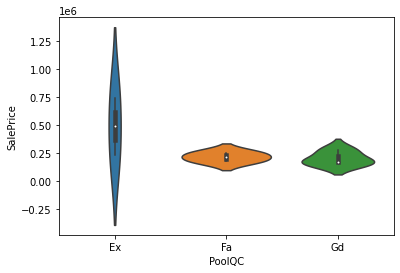

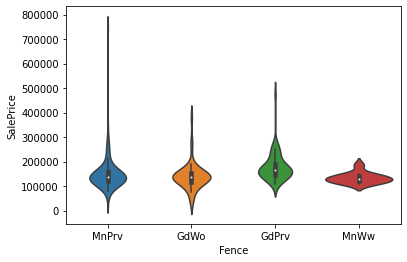

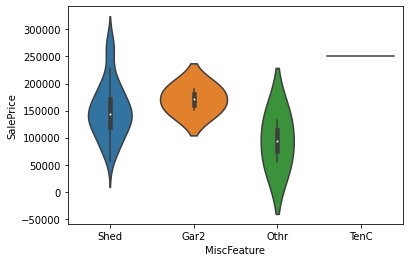

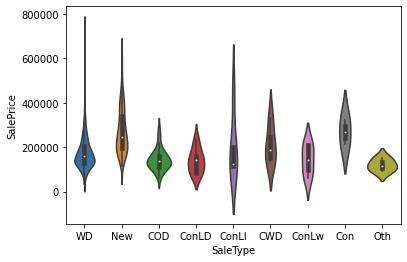

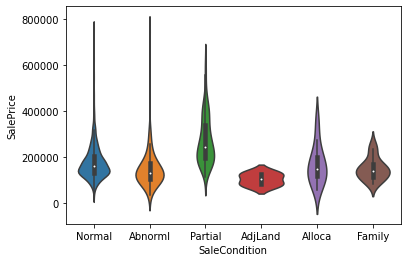

In [30]:
for col in categorical_cols:
    ax = sns.violinplot(x=col, y='SalePrice', data=train)
    plt.show()

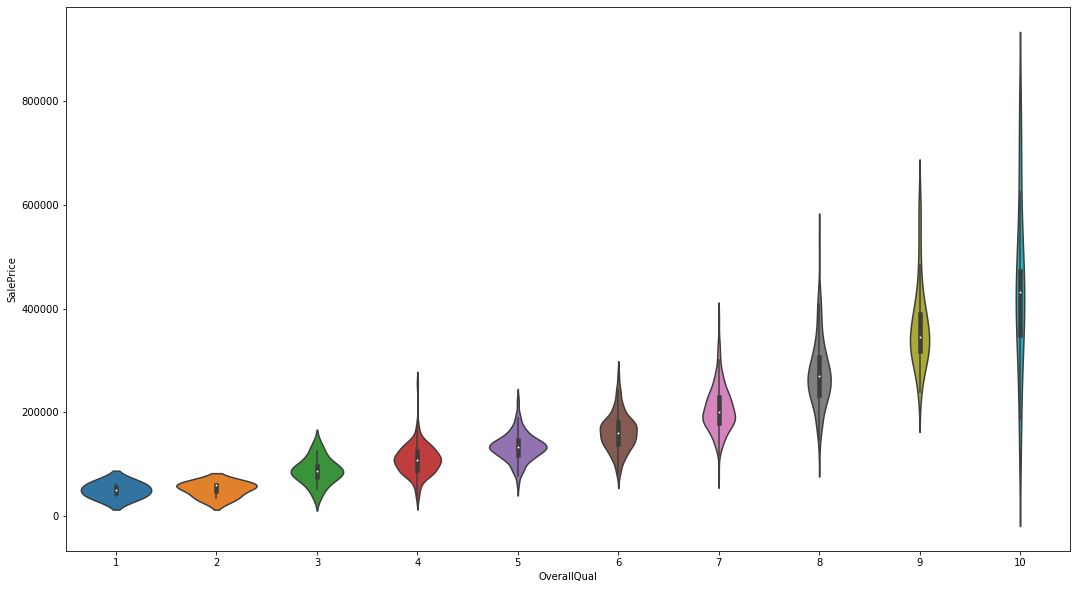

In [31]:
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.violinplot(x='OverallQual', y='SalePrice', data=train)
plt.show()

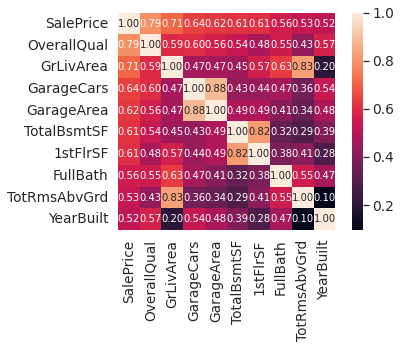

In [32]:
#saleprice correlation matrix
corrmat = train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# garagex,totalbsmt,1stFlrSF =>multicolinearity may exist because of high
# corelation between the abive the columns

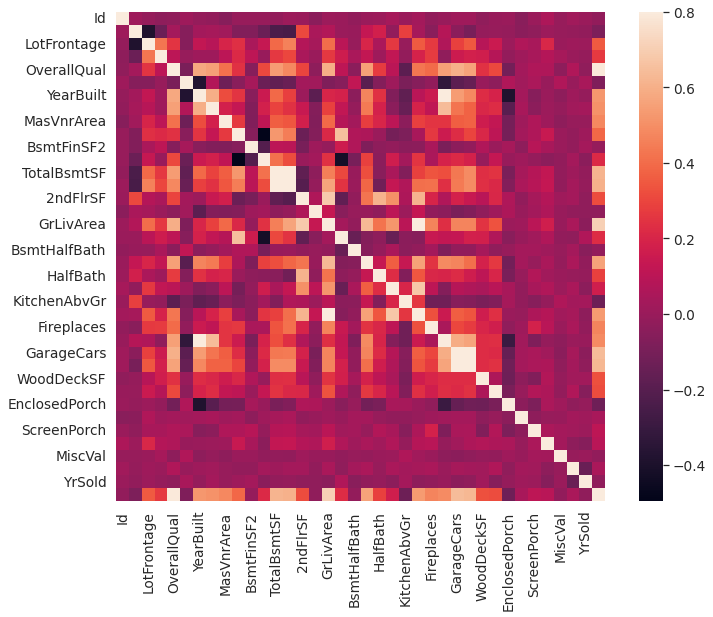

In [33]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


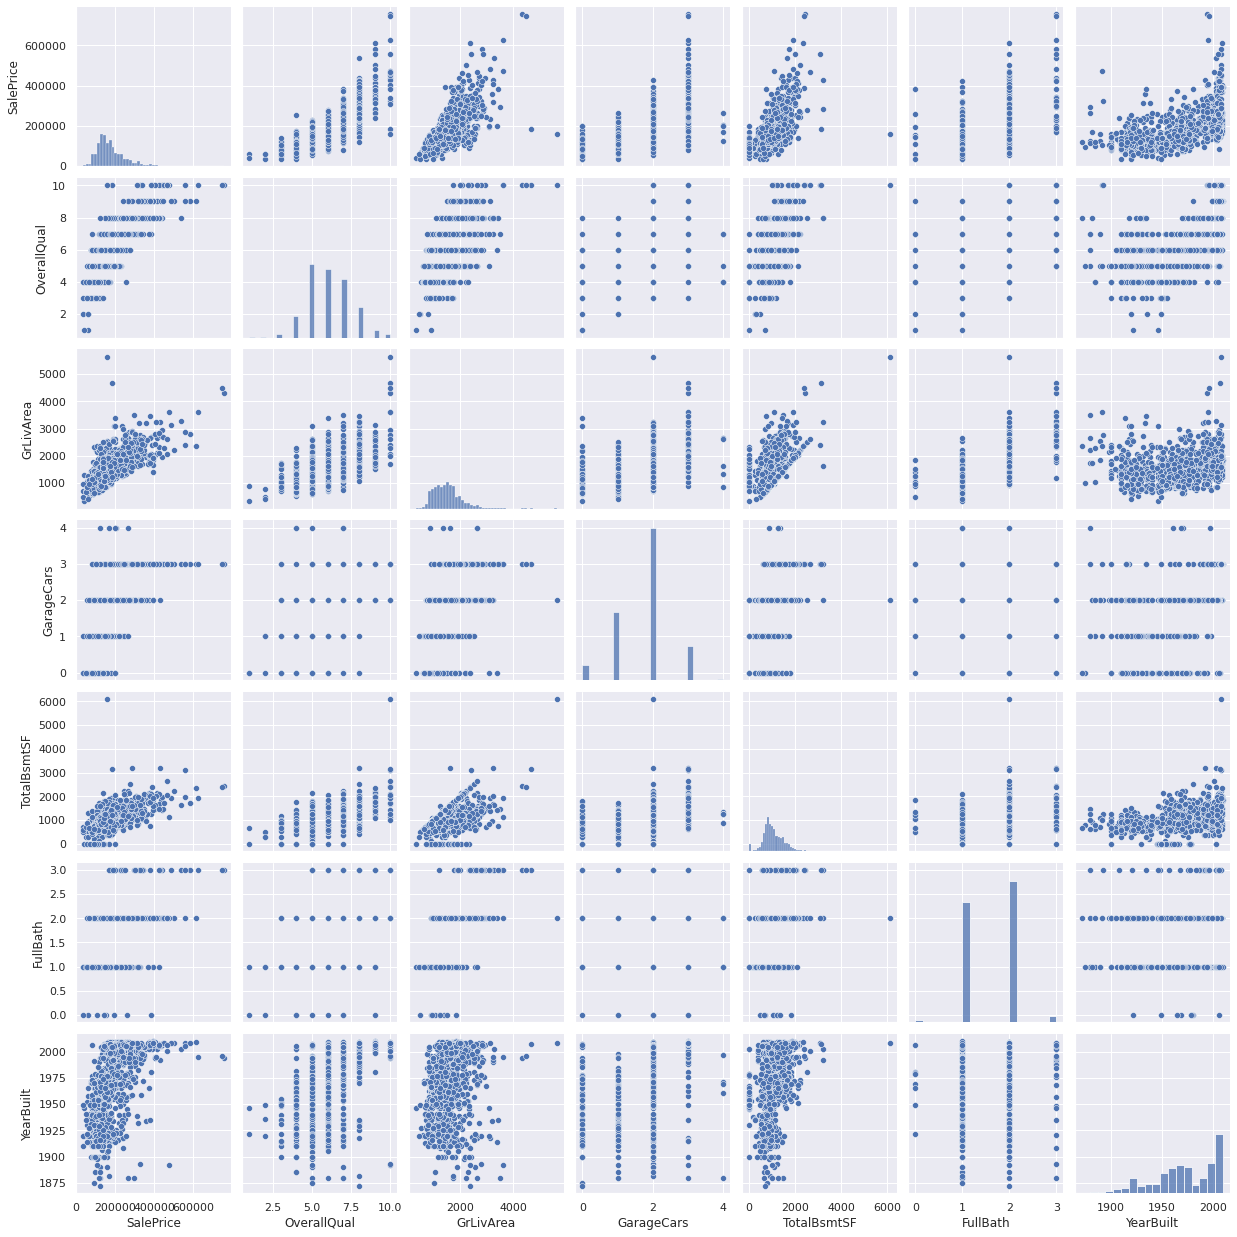

In [34]:
# copied
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height= 2.5)
plt.show()

In [35]:
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

In [36]:
 total = train.isnull().sum().sort_values(ascending=False)

In [37]:
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
# we will drop the variable if it has more than 15% of the data missing
# and of we see carefully the variables with the highest number of missing variables like 
# PoolQC ,MiscFeature,Alley these are factors that people don't usually consider while 
# buying a house so we can easily drop them
# Among GarageX variables GarageCars is the most important variable of all and luckily it
# doesn't have any missing values and so we can easily drop the other GarageX variables
# present.
# SAme goes for the BsmtX variables ,the most important among these are TotalBsmtSF hence
# we will drop the rest as they not very and important plus they contain missing values

In [38]:
missing_data.reset_index(inplace=True)

In [39]:
missing_data

,index,Total,Percent
0,PoolQC,1453,0.995205
1,MiscFeature,1406,0.963014
2,Alley,1369,0.937671
3,Fence,1179,0.807534
4,FireplaceQu,690,0.472603
...,...,...,...
76,ExterQual,0,0.000000
77,Exterior2nd,0,0.000000
78,Exterior1st,0,0.000000
79,RoofMatl,0,0.000000


In [40]:
columns_more_than_one_missing = []
for i in range(missing_data.shape[0]):
    if(missing_data.iloc[i,:]['Total']>1):
        columns_more_than_one_missing.append(missing_data.iloc[i,:]['index'])

In [41]:
columns_more_than_one_missing

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType']

In [42]:
missing_data.shape

(81, 3)

In [44]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
# train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(columns=columns_more_than_one_missing,axis=1)


In [46]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [47]:
train.shape

(1459, 63)

In [48]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [49]:
train = pd.get_dummies(train)

In [50]:
train = pd.DataFrame(train)

In [51]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [52]:
train.shape

(1459, 222)

In [53]:
y = train.SalePrice.values
X = train.drop(['SalePrice'],axis=1).values

In [54]:
X.shape

(1459, 221)

In [55]:
y.shape

(1459,)

In [56]:
# split data and test different regressors on validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=18)

In [57]:
from sklearn.preprocessing import RobustScaler

inScale = RobustScaler()
outScale = RobustScaler()

X_train = inScale.fit_transform(X_train)
y_train = outScale.fit_transform(y_train.reshape(-1, 1))
X_test = inScale.transform(X_test)
y_test = outScale.transform(y_test.reshape(-1, 1))

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=14).fit(X_train, y_train)
data_predicted = ridge.predict(X_test)
mse = mean_squared_error(y_test, data_predicted)
print("MSE: %.4f" % mse)

MSE: 0.0834


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=50, bootstrap=False, random_state=2, n_jobs=-1).fit(X_train, y_train.ravel())

data_predicted = rf.predict(X_test)
mse = mean_squared_error(y_test, data_predicted)
print("MSE: %.4f" % mse)

MSE: 0.0752


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=400).fit(X_train, y_train.ravel())
data_predicted = gbr.predict(X_test)
mse = mean_squared_error(y_test, data_predicted)
print("MSE: %.4f" % mse)

MSE: 0.0629


In [61]:
from xgboost import XGBRegressor
xb = XGBRegressor(n_estimators=200).fit(X_train, y_train.ravel())

data_predicted = xb.predict(X_test)
mse = mean_squared_error(y_test, data_predicted)
print("MSE: %.4f" % mse)


MSE: 0.0776


In [ ]:
# So it seems GradientBoostingRegressor works best for the validation dataset